<a href="https://colab.research.google.com/github/vezr96/Class-Programming-1-Vance/blob/main/ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Sample data: let's use a simple dataset of 2D points
data = np.random.random((1000, 32))  # 1000 samples of 32 features

# Define the dimensions of the input and the encoded representation
input_dim = data.shape[1]
encoding_dim = 16  # Compress to 16 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
patience=5,  # Number of epochs with no improvement after which training will be stopped
restore_best_weights=True)  # Restores model to best weights with the lowest validation loss

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()


# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model

reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Combine the encoder and decoder into an autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(data, data, epochs=100, batch_size=256, shuffle=True, validation_split=0.2,
                callbacks=[reduce_lr, early_stopping, checkpoint, terminate_on_nan])

# Once trained, we can use the encoder part separately
encoder = Model(input_layer, encoded)

# Let's look at the encoded representations
encoded_data = encoder.predict(data)
print(encoded_data.shape)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.7027
Epoch 1: val_loss improved from inf to 0.69955, saving model to autoencoder_best.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 238ms/step - loss: 0.7028 - val_loss: 0.6995 - learning_rate: 0.0010
Epoch 2/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.7022
Epoch 2: val_loss improved from 0.69955 to 0.69799, saving model to autoencoder_best.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7010 - val_loss: 0.6980 - learning_rate: 0.0010
Epoch 3/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6993
Epoch 3: val_loss improved from 0.69799 to 0.69672, saving model to autoencoder_best.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6989 - val_loss: 0.6967 - learning_rate: 0.0010
Epoch 4/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6970
Epoch 4: val_loss improved from 0.69672 to 0.69573, saving model to autoencoder_best.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6972 - val_loss: 0.6957 - learning_rate: 0

In [ ]:
encoded_data = encoder.predict(data)
print(encoded_data)
print(encoded_data.shape)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[0.         0.6587084  0.         ... 0.50411046 0.         0.92530924]
 [0.         0.9308194  0.         ... 0.75448126 0.         0.12923726]
 [0.         0.42234325 0.         ... 0.9845851  0.         0.5555789 ]
 ...
 [0.         0.         0.         ... 0.60433686 0.         0.7616129 ]
 [0.1226224  0.79519737 0.         ... 0.30011407 0.         0.7148751 ]
 [0.29184368 0.         0.         ... 0.7668958  0.         0.37858176]]
(1000, 16)


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4420
Epoch 1: val_loss improved from inf to 0.31243, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4416 - val_loss: 0.3124 - learning_rate: 0.0010
Epoch 2/25
215/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3036
Epoch 2: val_loss improved from 0.31243 to 0.29242, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3032 - val_loss: 0.2924 - learning_rate: 0.0010
Epoch 3/25
209/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2875
Epoch 3: val_loss improved from 0.29242 to 0.28236, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2872 - val_loss: 0.2824 - learning_rate: 0.0010
Epoch 4/25
220/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2792
Epoch 4: val_loss improved from 0.28236 to 0.27769, saving model to autoencoder_best.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2791 - val_loss: 0.2777 

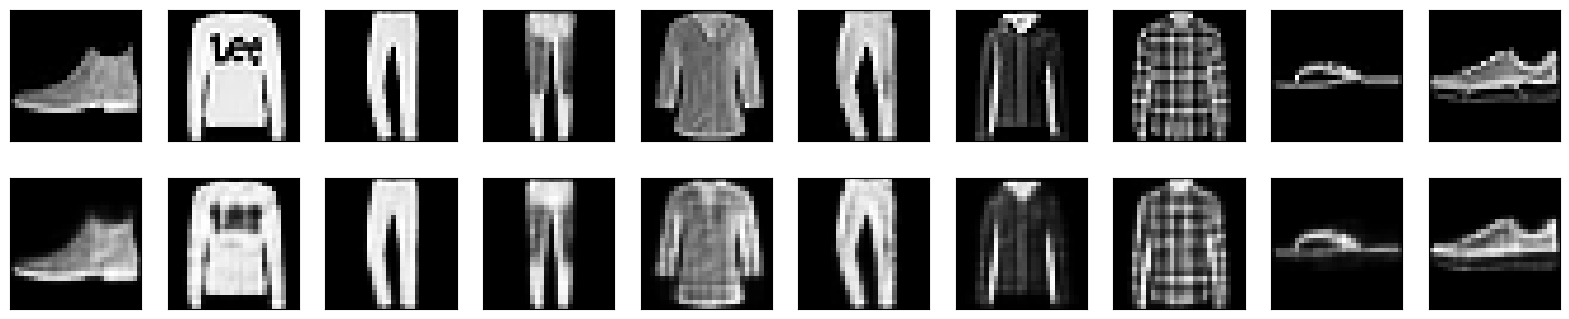

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint



# Load Fashion MNIST data
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize data to values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define the dimensions
input_dim = 28 * 28  # 784 input neurons
encoding_dim = 144    # Compress to 128, but was 64 features

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Define the decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',
patience=5,  # Number of epochs with no improvement after which training will be stopped
restore_best_weights=True)  # Restores model to best weights with the lowest validation loss

# Define the TerminateOnNaN callback
terminate_on_nan = TerminateOnNaN()


# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath='autoencoder_best.keras',  # File path to save the model
                             monitor='val_loss',  # Metric to monitor
                             save_best_only=True,  # Save only the best model (based on the monitored metric)
                             mode='min',  # Minimize the monitored metric (e.g., validation loss)
                             save_weights_only=False,  # Save the entire model (set to True to save only weights)
                             verbose=1)  # Print a message when saving the model

reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metric to monitor
                              factor=0.5,  # Factor by which the learning rate will be reduced (new_lr = lr * factor)
                              patience=3,  # Number of epochs with no improvement after which learning rate will be reduced
                              min_lr=1e-6,  # Lower bound for the learning rate
                              verbose=1)  # Print message when the learning rate is reduced

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test),
                callbacks=[reduce_lr, early_stopping, checkpoint, terminate_on_nan])

# Define the encoder model to get the compressed representation
encoder = Model(input_layer, encoded)

# Encode and decode some images from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


It stop at 83 out of 100 because the last 5 did not keep improving when it was set to 100 epochs.
No Nan.
The learning rate never reduced because it kept on impoving.

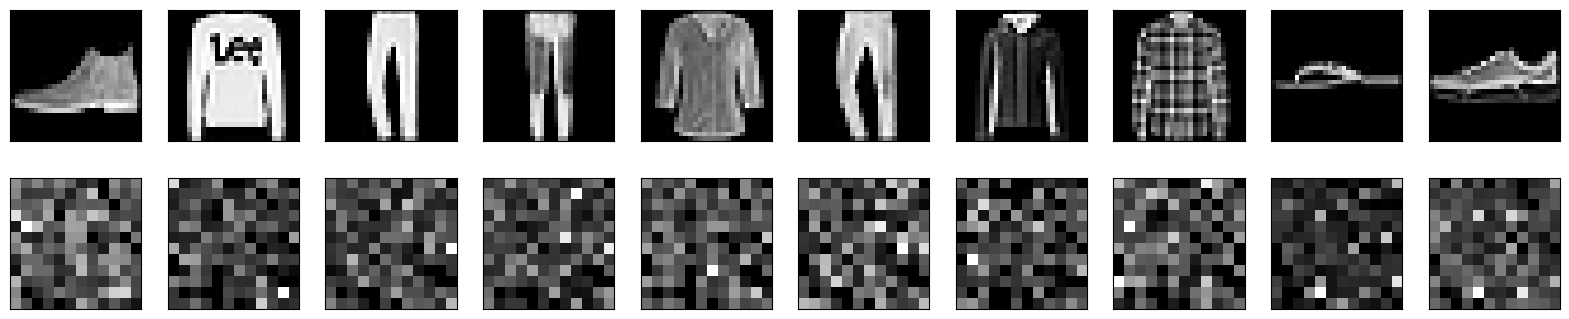

In [ ]:
# Visualizing original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(12, 12), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2798
Epoch 1: val_loss did not improve from 0.06375
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2794 - val_loss: 0.1105 - learning_rate: 0.0010
Epoch 2/50
225/235 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1039
Epoch 2: val_loss did not improve from 0.06375
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1036 - val_loss: 0.0864 - learning_rate: 0.0010
Epoch 3/50
222/235 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0843
Epoch 3: val_loss did not improve from 0.06375
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0842 - val_loss: 0.0773 - learning_rate: 0.0010
Epoch 4/50
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0766
Epoch 4: val_loss did not improve from 0.06375
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0765 - val_loss: 0.0727 - learning_rate: 0.0010
Epoch 5/50
217/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0725
Epoch 5: val_loss did not improve from 0.06375
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3m

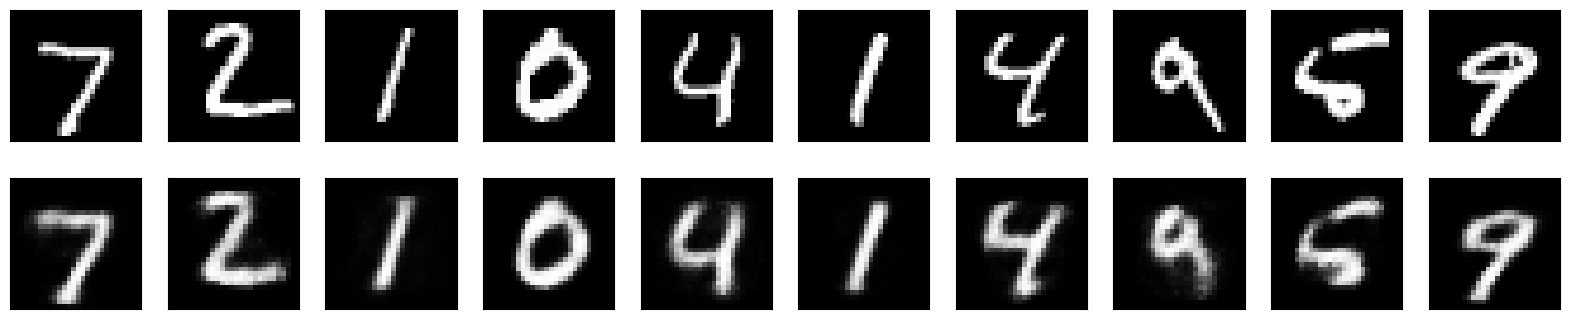

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define dimensions
input_dim = 28 * 28   # Input dimension (784)
encoding_dim = 256     # Compress to a much smaller size (32)

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder: Encodes the input to a smaller representation
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder: Reconstructs the input from the encoded representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Full autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), callbacks= [reduce_lr, early_stopping, checkpoint, terminate_on_nan])

# Encoder model for extracting compressed representations
encoder = Model(input_layer, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


ReduceLR only, every third Epoch reduced after 31st. All callbacks stops after  Epoch five.

> Add blockquote



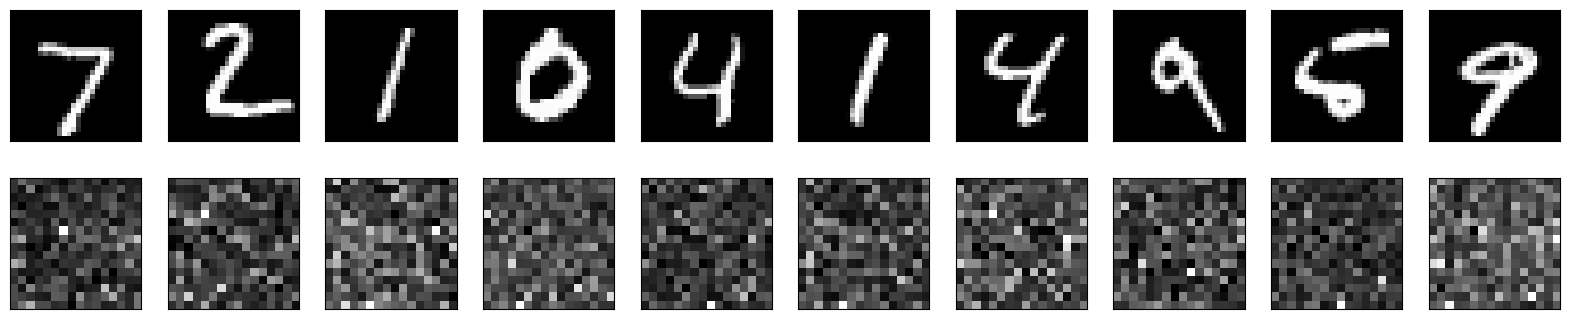

In [ ]:
# Display original and reconstructed images
n = 10  # Display 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(16, 16), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2168 - val_loss: 0.0806 - learning_rate: 0.0010
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0775 - val_loss: 0.0702 - learning_rate: 0.0010
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0697 - val_loss: 0.0673 - learning_rate: 0.0010
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0673 - val_loss: 0.0661 - learning_rate: 0.0010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0661 - val_loss: 0.0653 - learning_rate: 0.0010
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0653 - val_loss: 0.0649 - learning_rate: 0.0010
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0650 - val_loss: 0.0645 - learning_rate: 0.0010
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0646 - val_loss: 0.0643 - learning_rate: 0.0010
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0644 - val_loss: 0.0641 - learning_rate: 0.0010
Epoch 10/5

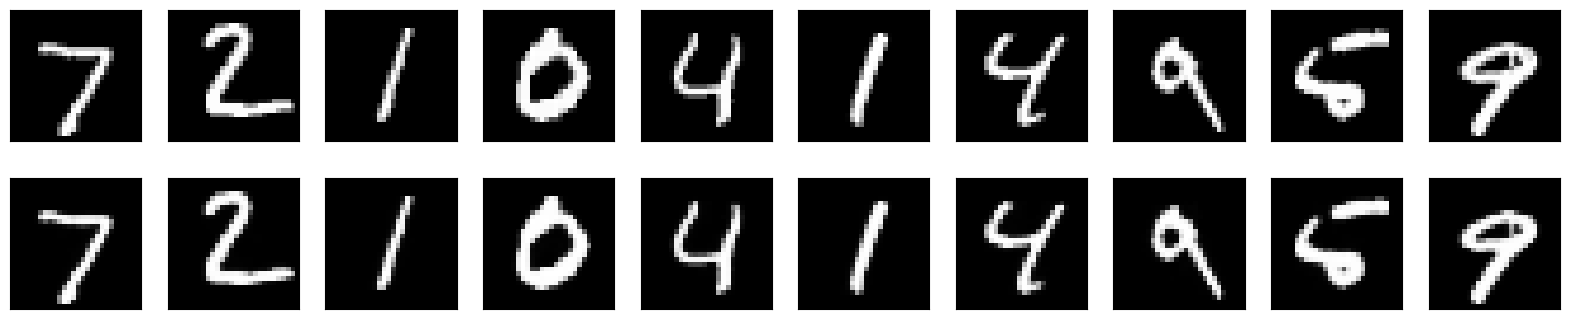

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define dimensions
input_dim = 28 * 28   # Input dimension (784)
encoding_dim = 1024   # Overcomplete layer: larger than the input size

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder: Encodes the input to a larger representation (overcomplete)
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder: Reconstructs the input from the encoded representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Full autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), callbacks= [reduce_lr, early_stopping, checkpoint, terminate_on_nan])

# Encoder model for extracting encoded (overcomplete) representations
encoder = Model(input_layer, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


All callbacks stops after Epoch five. Earlystop only and stops after five.reduce_lr only started reducing after 25th.




Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5104 - val_loss: 0.2647
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2477 - val_loss: 0.2172
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2131 - val_loss: 0.2010
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1988 - val_loss: 0.1910
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1894 - val_loss: 0.1833
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1824 - val_loss: 0.1772
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1766 - val_loss: 0.1725
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1727 - val_loss: 0.1687
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1689 - val_loss: 0.1656
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1659 - val_loss: 0.1628
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1629 - val_loss: 0.1601
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

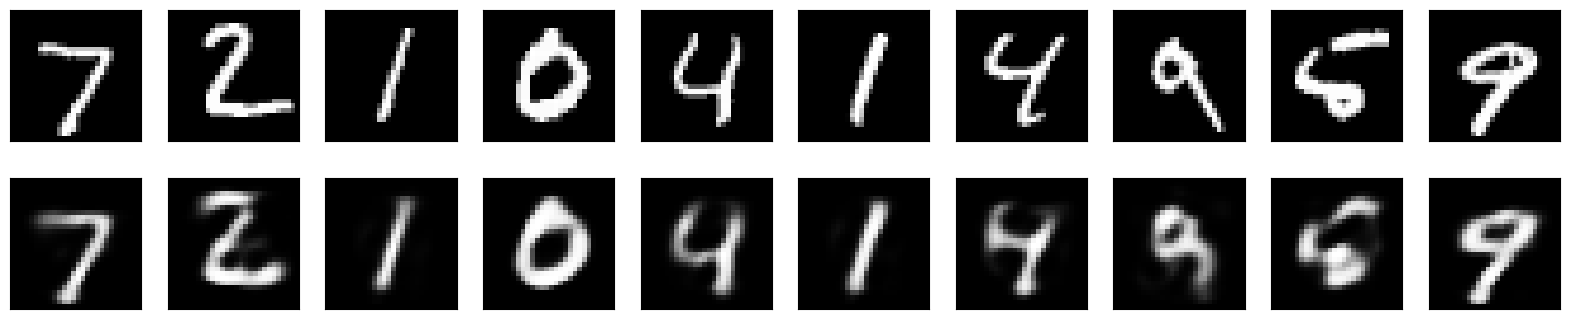

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Define dimensions
input_dim = 28 * 28   # Input dimension (784)
encoding_dim = 128    # Encoded dimension

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder: Apply L1 regularization to induce sparsity
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-5))(input_layer)

# Decoder: Reconstruct the input
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Full autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test), callbacks= [reduce_lr, early_stopping, checkpoint, terminate_on_nan])

# Encoder model for extracting sparse representations
encoder = Model(input_layer, encoded)

# Get encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


All callbacks stops after Epoch five. Earlystop only and stops after five.

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3146 - val_loss: 0.1687 - learning_rate: 0.0010
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1609 - val_loss: 0.1398 - learning_rate: 0.0010
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1377 - val_loss: 0.1280 - learning_rate: 0.0010
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1274 - val_loss: 0.1219 - learning_rate: 0.0010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1219 - val_loss: 0.1186 - learning_rate: 0.0010
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1182 - val_loss: 0.1159 - learning_rate: 0.0010
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1159 - val_loss: 0.1145 - learning_rate: 0.0010
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1144 - val_loss: 0.1132 - learning_rate: 0.0010
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1131 - val_loss: 0.1125 - learning_rate: 0.0010
Epoch 10/5

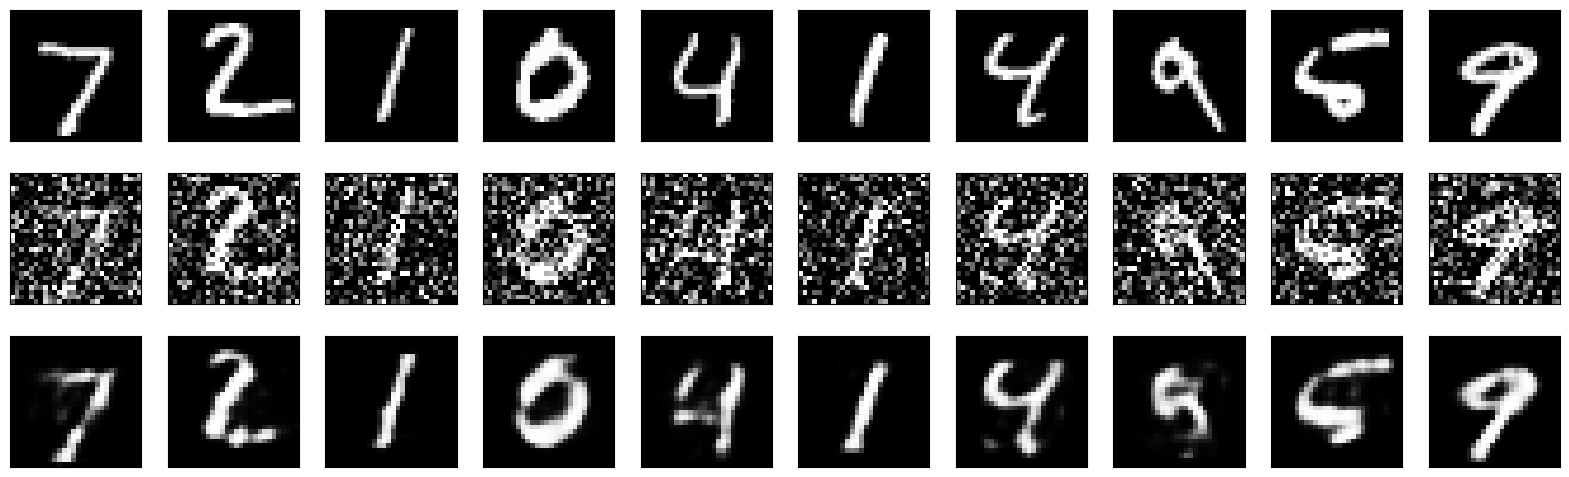

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TerminateOnNaN
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images into vectors of size 784 (28x28)
x_train = x_train.reshape((x_train.shape[0], 28 * 28))
x_test = x_test.reshape((x_test.shape[0], 28 * 28))

# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to keep them between 0 and 1
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define dimensions
input_dim = 28 * 28  # Input dimension (784)
encoding_dim = 128   # Encoded dimension

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Full autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder using the noisy images as input and clean images as output
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test), callbacks= [reduce_lr, early_stopping, checkpoint, terminate_on_nan])

# Denoise the images using the trained autoencoder
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display original, noisy, and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed (denoised) images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


All callbacks stops after Epoch five. Earlystop only and stops after five. ReduceLR only, every forth Epoch reduced after 34th.